In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings("ignore")


In [82]:
# Load the dataset
data = pd.read_excel('studentdata.xlsx')

#head of the dataset
print("Head of the dataset:")
print(data.head(10))

#shape of the dataset
print("\nShape of the dataset:")
print(data.shape)

#info of the dataset
print("Info of the dataset:")
print(data.info())

#Summary of the dataset
print("\nSummary of the dataset:")
print(data.describe(include='all'))

#Handling missing values
print("\nMissing values before handling:")
print(data.isnull().sum())

#Drop rows with missing values(this is one way for handling missing values)
print(data.dropna())

print(data.isnull().sum())

#Duplicate records handling
print("\nDuplicate records before handling:")
print(data.duplicated().sum())

#Drop duplicate records
print(data.drop_duplicates())
print(data.dtypes)


Head of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0       1        group B           bachelor's degree      standard   
1       1        group C                some college      standard   
2       1        group B             master's degree      standard   
3       0        group A          associate's degree  free/reduced   
4       0        group C                some college      standard   
5       1        group B          associate's degree      standard   
6       1        group B                some college      standard   
7       0        group B                some college  free/reduced   
8       0        group D                 high school  free/reduced   
9       1        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88 

In [84]:
# Descriptive Statistics
#Code for Mean, Median, Mode, Variance, Standard Deviation
# Basic descriptive statistics

# Descriptive statistics
print("Descriptive Statistics:\n", data.describe(include='all'))

# Median
print("\nMedian:\n", data.median(numeric_only=True))

# Mode
print("\nMode:\n", data.mode().iloc[0])

# Standard Deviation
print("\nStandard Deviation:\n", data.std(numeric_only=True))

# Variance
print("\nVariance:\n", data.var(numeric_only=True))

Descriptive Statistics:
             gender race/ethnicity parental level of education     lunch  \
count   200.000000            200                         200       200   
unique         NaN              5                           6         2   
top            NaN        group C                some college  standard   
freq           NaN             60                          50       128   
mean      0.500000            NaN                         NaN       NaN   
std       0.501255            NaN                         NaN       NaN   
min       0.000000            NaN                         NaN       NaN   
25%       0.000000            NaN                         NaN       NaN   
50%       0.500000            NaN                         NaN       NaN   
75%       1.000000            NaN                         NaN       NaN   
max       1.000000            NaN                         NaN       NaN   

       test preparation course  math score  reading score  writing score  

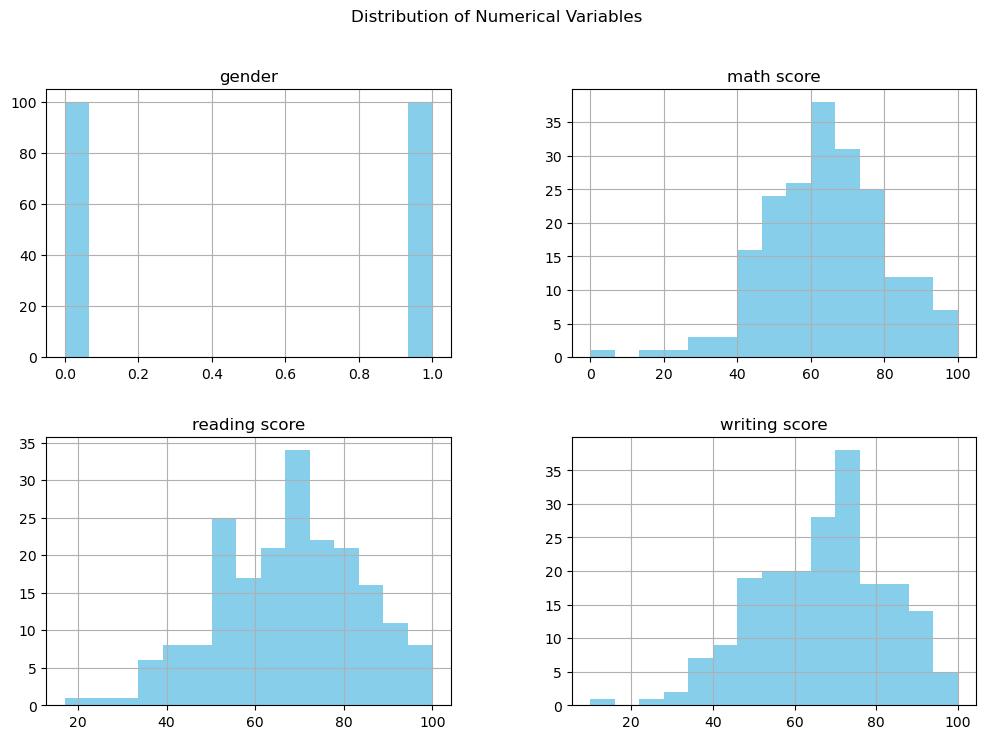

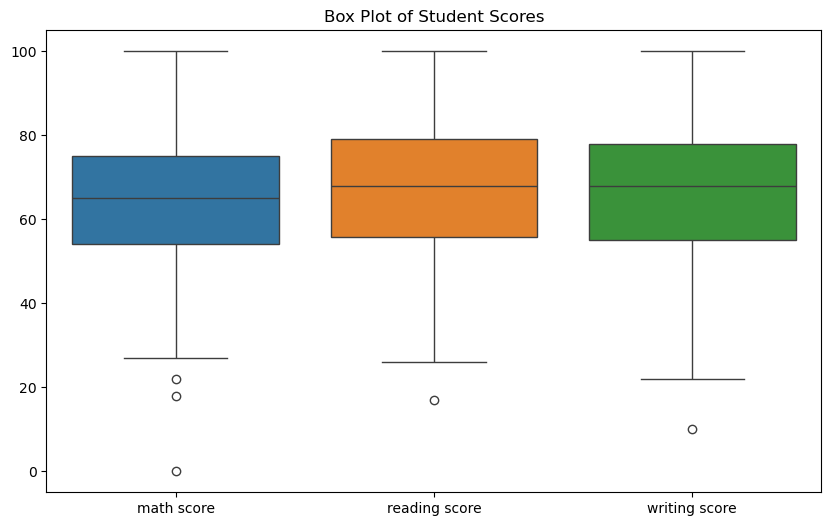

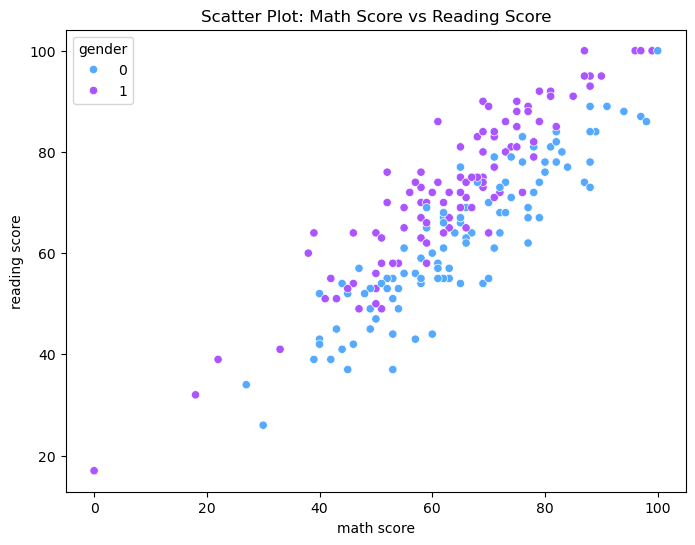

In [86]:
# Visualizations (Histograms, Box Plots, Scatter Plots)
# Plot histograms for numerical columns
data.hist(bins=15, figsize=(12, 8), color='skyblue')
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Box plot for scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['math score', 'reading score', 'writing score']])
plt.title('Box Plot of Student Scores')
plt.show()

# Scatter plot for scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', data=data, hue='gender', palette='cool')
plt.title('Scatter Plot: Math Score vs Reading Score')
plt.show()

               math score  reading score  writing score
math score       1.000000       0.859520       0.854522
reading score    0.859520       1.000000       0.963359
writing score    0.854522       0.963359       1.000000


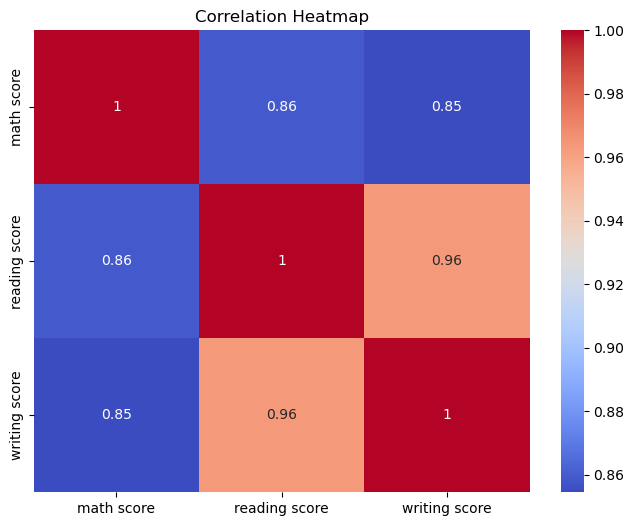

In [87]:
# Correlation Analysis and Heatmap
#Correlation Matrix
corr_matrix = data[['math score', 'reading score', 'writing score']].corr()
print(corr_matrix)

# Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [88]:
# Data Preparation (Training, Testing, Validation)
# Preparing Data for Regression
# Features and target
X = data[['math score', 'reading score']]
y = data['writing score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
#Training and Evaluating the Model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict the writing score
y_pred = reg.predict(X_test)

# Print regression performance metrics
print("\nLinear Regression Results:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")



Linear Regression Results:
R² Score: 0.9369
Mean Squared Error: 18.0219


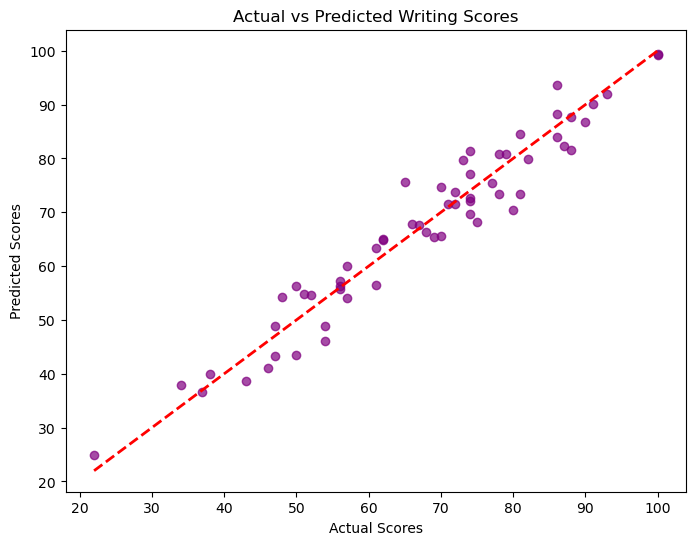

In [90]:
# Scatter plot of actual vs predicted scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Writing Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()


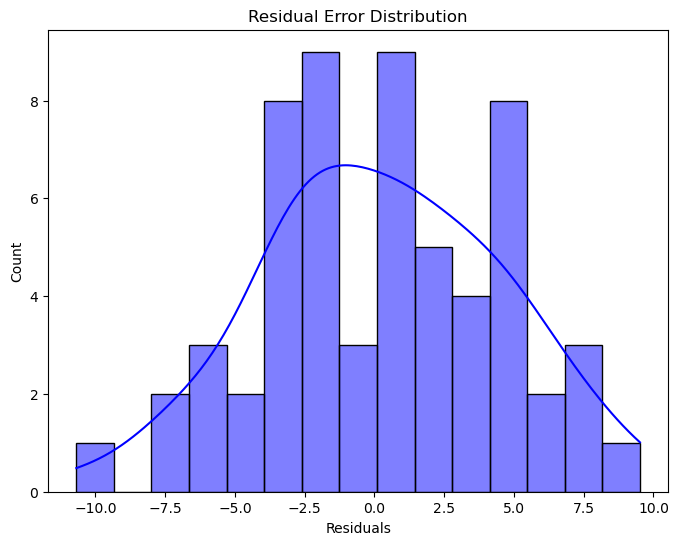

In [91]:
#Residual Error Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=15, kde=True, color='blue')
plt.title('Residual Error Distribution')
plt.xlabel('Residuals')
plt.show()



Cluster Distribution:
 Cluster
2    90
1    60
0    50
Name: count, dtype: int64


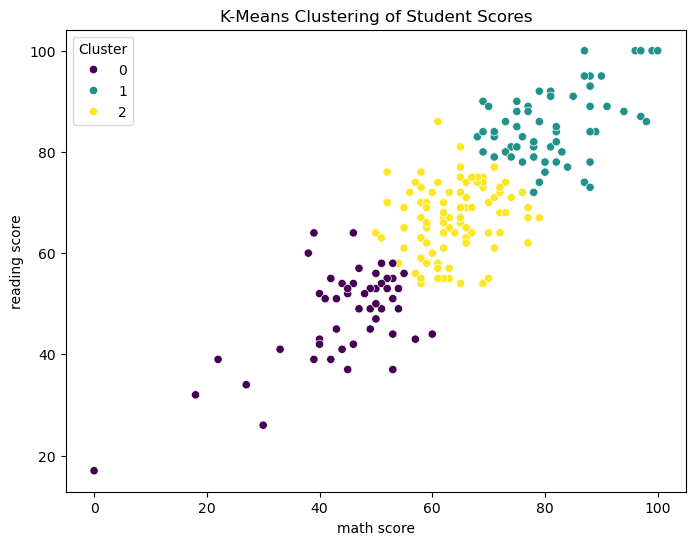

In [92]:
# Apply K-Means clustering with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['math score', 'reading score']])

# Print the cluster distribution
print("\nCluster Distribution:\n", data['Cluster'].value_counts())

# Plot K-means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', hue='Cluster', data=data, palette='viridis')
plt.title('K-Means Clustering of Student Scores')
plt.show()



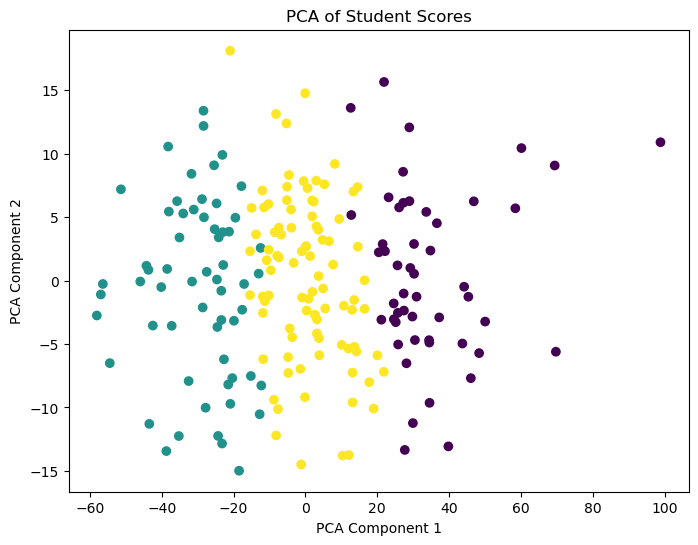

In [93]:
# Dimensionality Reduction with PCA

# Apply PCA for visualization (2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data[['math score', 'reading score', 'writing score']])

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('PCA of Student Scores')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [94]:
# Preparing Data for Classification

# Encode gender as numeric values (0 or 1)
data['gender'] = data['gender'].astype('category').cat.codes

# Features and target
X_class = data[['math score', 'reading score', 'writing score']]
y_class = data['gender']

# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)


In [95]:
# Training and Evaluating Random Forest Classifier
# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict gender on test data
y_pred_class = clf.predict(X_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))



Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.77      0.77      0.77        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



<Figure size 600x600 with 0 Axes>

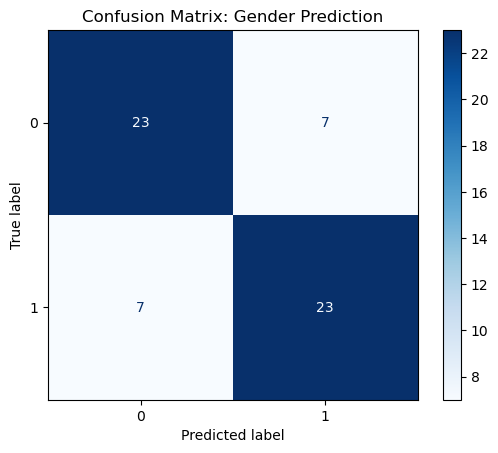

In [96]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class, cmap='Blues')
plt.title('Confusion Matrix: Gender Prediction')
plt.show()



Cross-Validation R² Scores: [0.92191674 0.93262334 0.93352685 0.91194997 0.91508729]
Average R² Score: 0.9230


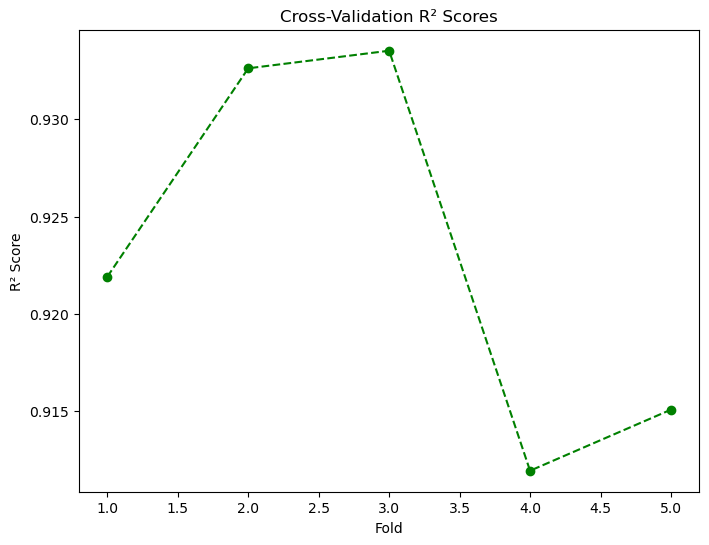

In [98]:
# Perform 5-fold cross-validation on the regression model
cv_scores = cross_val_score(reg, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("\nCross-Validation R² Scores:", cv_scores)
print(f"Average R² Score: {np.mean(cv_scores):.4f}")

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='green')
plt.title('Cross-Validation R² Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.show()


Objective:
The main focus of this code was to explore, analyze, and predict outcomes related to student performance data using various machine learning techniques.
Specifically, it aimed to predict writing scores, identify score-based clusters, and classify gender based on student performance. 

Steps and Outcomes
Data Loading and Cleaning:

Loaded the dataset from an Excel file.
Checked for missing and duplicate records.
Performed basic descriptive statistics (mean, median, mode, standard deviation).
Outcome: The dataset was cleaned and ready for further analysis.
Data Visualization:

Visualized data patterns using:
Histograms to show the distribution of scores.
Box plots to highlight outliers in student performance.
Scatter plots to explore relationships between scores.
Correlation heatmap to examine score correlations.
Outcome: Identified meaningful relationships between student performance metrics, especially a strong correlation between reading, math, and writing
    
    
    scores.
Regression Modeling (Linear Regression):

Objective: Predict writing scores based on math and reading scores.
Outcome:
R² Score: Indicates how well the model fits the data. A higher score shows better performance.
MSE (Mean Squared Error): Measures how far off the predictions were from the actual scores.
The predictions showed reasonable accuracy, with the actual vs. predicted scores aligning fairly well in the scatter plot.
Clustering (K-Means):

Objective: Group students into clusters based on math and reading scores.
Outcome:
Formed 3 clusters of students.
The scatter plot helped visualize how students with similar performance were grouped, indicating potential patterns in the dataset.
Dimensionality Reduction (PCA):

Objective: Reduce the dataset to 2 principal components for easier visualization.
Outcome:
PCA simplified the multidimensional data, helping to visualize clusters in a 2D space without losing much information.
Classification (Random Forest Classifier):

Objective: Predict gender based on students' math, reading, and writing scores.
Outcome:
The classification report showed how well the model identified male vs. female students.
Confusion Matrix provided insights into correct and incorrect predictions, helping evaluate the model’s performance.
Cross-Validation (for Linear Regression):

Objective: Evaluate the consistency of the linear regression model with multiple data splits (5-fold cross-validation).
Outcome:
The R² scores across the folds were consistent, indicating a stable regression model.
Outcomes vs. Objectives
Writing Score Prediction:

Achieved: The linear regression model was able to reasonably predict students' writing scores using math and reading scores, showing that 
the selected features were appropriate.
Clustering:

Achieved: Students were effectively grouped into meaningful clusters, revealing underlying score-based patterns.
Gender Prediction:

Achieved: The Random Forest Classifier performed well in predicting gender, as observed from the classification report and confusion matrix.
Model Validation:

Achieved: Cross-validation confirmed the reliability of the linear regression model, showing consistent performance across multiple folds.
Summary of Techniques Used:
Regression:

Linear Regression for predicting writing scores.
Clustering:

K-Means to group students based on performance.
Dimensionality Reduction:

PCA to visualize reduced dimensions of student scores.
Classification:

Random Forest to predict gender based on scores.
Cross-Validation:

Ensured the stability of the regression model across multiple splits.
